## Project: Application of Classification Model

### Problem 1: Prediction task is to determine whether a person makes over 50K a year.

#### Import Libraries

In [1]:
# Import the Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Data Pre-Processing

In [2]:
## Read the Datset
adult = pd.read_csv('adult.data')
adult.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
adult.shape

(32560, 15)

In [4]:
adult.columns=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']

In [5]:
adult.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [6]:
adult.income.unique()

array([' <=50K', ' >50K'], dtype=object)

In [7]:
adult['income']=np.where(adult['income'].str.contains(' <=50K'), 0, 1)

In [8]:
adult['income'].head(5)

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int32

In [9]:
adult.income.unique()

array([0, 1], dtype=int64)

In [10]:
adult.head(4)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [11]:
## Describe the Dataset
adult.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469,0.240817
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618,0.427586
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [12]:
## Information of the Dataset
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
age               32560 non-null int64
workclass         32560 non-null object
fnlwgt            32560 non-null int64
education         32560 non-null object
education-num     32560 non-null int64
marital-status    32560 non-null object
occupation        32560 non-null object
relationship      32560 non-null object
race              32560 non-null object
sex               32560 non-null object
capital-gain      32560 non-null int64
capital-loss      32560 non-null int64
hours-per-week    32560 non-null int64
native-country    32560 non-null object
income            32560 non-null int32
dtypes: int32(1), int64(6), object(8)
memory usage: 3.6+ MB


In [13]:
## Treating workclass
adult.workclass.unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [14]:
adult.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [15]:
adult['marital-status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [16]:
df_wc=pd.get_dummies(adult.workclass,prefix='wc_',drop_first=True)
adult_new=pd.concat([adult,df_wc],axis=1)
df_edu=pd.get_dummies(adult.education,prefix='edu_',drop_first=True)
adult_new=pd.concat([adult_new,df_edu],axis=1)
df_ms=pd.get_dummies(adult['marital-status'],prefix='ms',drop_first=True)
adult_new=pd.concat([adult_new,df_ms],axis=1)
df_occu=pd.get_dummies(adult.occupation,prefix='occu_',drop_first=True)
adult_new=pd.concat([adult_new,df_occu],axis=1)
df_rel=pd.get_dummies(adult.relationship,prefix='rel_',drop_first=True)
adult_new=pd.concat([adult_new,df_rel],axis=1)
df_race=pd.get_dummies(adult.race,prefix='race_',drop_first=True)
adult_new=pd.concat([adult_new,df_race],axis=1)
df_sex=pd.get_dummies(adult.sex,prefix='sex_',drop_first=True)
adult_new=pd.concat([adult_new,df_sex],axis=1)
df_country=pd.get_dummies(adult['native-country'],prefix='country_',drop_first=True)
adult_new=pd.concat([adult_new,df_country],axis=1)

In [17]:
labels=adult['education'].astype('category').cat.categories.tolist()

In [18]:
replace_map_comp = {'education' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp)

{'education': {' 10th': 1, ' 11th': 2, ' 12th': 3, ' 1st-4th': 4, ' 5th-6th': 5, ' 7th-8th': 6, ' 9th': 7, ' Assoc-acdm': 8, ' Assoc-voc': 9, ' Bachelors': 10, ' Doctorate': 11, ' HS-grad': 12, ' Masters': 13, ' Preschool': 14, ' Prof-school': 15, ' Some-college': 16}}


In [19]:
adult_new.drop(labels=['workclass','education','marital-status','occupation','relationship','race','sex','native-country'],axis=1,inplace=True)

In [20]:
adult_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Columns: 101 entries, age to country__ Yugoslavia
dtypes: int32(1), int64(6), uint8(94)
memory usage: 4.5 MB


In [21]:
adult_new.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,wc__ Federal-gov,wc__ Local-gov,wc__ Never-worked,...,country__ Portugal,country__ Puerto-Rico,country__ Scotland,country__ South,country__ Taiwan,country__ Thailand,country__ Trinadad&Tobago,country__ United-States,country__ Vietnam,country__ Yugoslavia
0,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [22]:
X=adult_new.loc[:,adult_new.columns!='income']
y=adult_new.income

In [23]:
adult.head(1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0


In [24]:
y1=adult.income
X1=adult.loc[:,adult.columns!='income']

#### Model Building and Evaluation

In [25]:
import xgboost
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [26]:
from sklearn.model_selection import cross_val_score,train_test_split
reg = xgboost.XGBClassifier()
score = cross_val_score(reg,X,y,cv=20)
score.mean()

0.864158584542379

In [27]:
print('The average score of XGBoost model for adult data set is: ',score.mean())

The average score of XGBoost model for adult data set is:  0.864158584542379


### Problem 2: Which factors are important

#### Univariate Selection

In [28]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=15)
fit = bestfeatures.fit(X,y)

In [29]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [30]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores

,Specs,Score
0,age,8.600737e+03
1,fnlwgt,1.718124e+05
2,education-num,2.401748e+03
3,capital-gain,8.219773e+07
4,capital-loss,1.372049e+06
5,hours-per-week,6.476435e+03
6,wc__ Federal-gov,1.113800e+02
7,wc__ Local-gov,3.335219e+01
8,wc__ Never-worked,2.220438e+00
9,wc__ Private,6.087378e+01


In [31]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [32]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[1.50016196e-01 1.68591268e-01 3.88918939e-02 6.78797550e-02
 2.44932381e-02 9.30956069e-02 5.20793805e-03 5.18775486e-03
 2.68452380e-06 9.44626846e-03 8.69594179e-03 7.81038110e-03
 4.82641236e-03 5.84177015e-05 2.22109635e-03 9.62105573e-04
 2.01251385e-04 7.82471198e-04 2.26669086e-03 1.27782862e-03
 2.83743394e-03 3.84964670e-03 2.24252935e-02 5.30510910e-03
 8.15069777e-03 1.34576134e-02 7.04347695e-05 7.31152692e-03
 6.03543690e-03 3.43191299e-04 9.46321974e-02 1.57913325e-03
 4.94432126e-02 1.97302422e-03 2.66424085e-03 4.57969210e-03
 5.19748659e-06 5.84639224e-03 1.94629036e-02 4.23840716e-03
 3.26726061e-03 4.08430687e-03 8.93254477e-03 1.68979102e-04
 1.56580352e-02 2.71725923e-03 5.88934571e-03 4.39793995e-03
 3.74443033e-03 1.18800650e-02 2.70647152e-03 1.07680919e-02
 6.35897677e-03 9.38152870e-03 2.80951816e-03 4.91793156e-03
 1.13315410e-03 6.41779633e-03 2.19778895e-02 3.41554732e-04
 1.25535976e-03 6.17404442e-04 3.34883773e-04 8.06907784e-04
 2.17823677e-04 1.942453

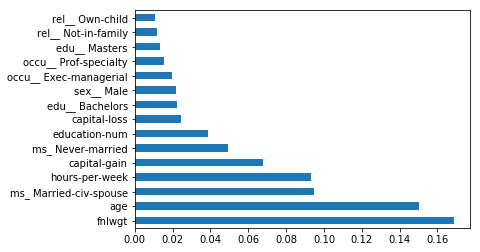

In [33]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

* fnlwgy is most important feature in the dataset
* age is the next important factor 
* Above graph shows the imporatnce of the features fot top 15 features

#### Correlation Matrix with Heatmap

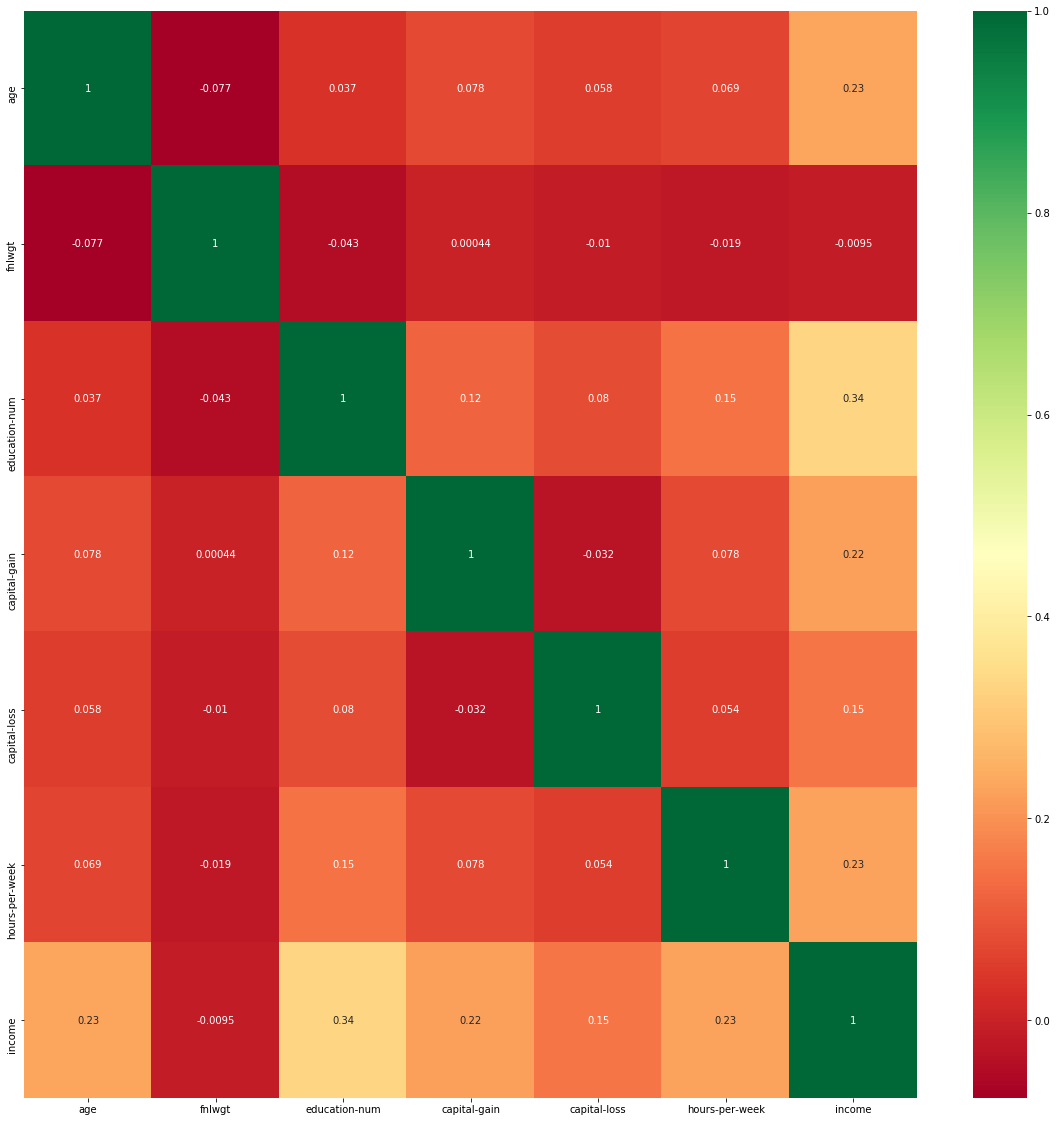

In [34]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = adult.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(adult_new[top_corr_features].corr(),annot=True,cmap="RdYlGn")

* there is no strong corelation between any two features
* All features are independent to each other

### Problem 3:Which algorithms are best for this dataset

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


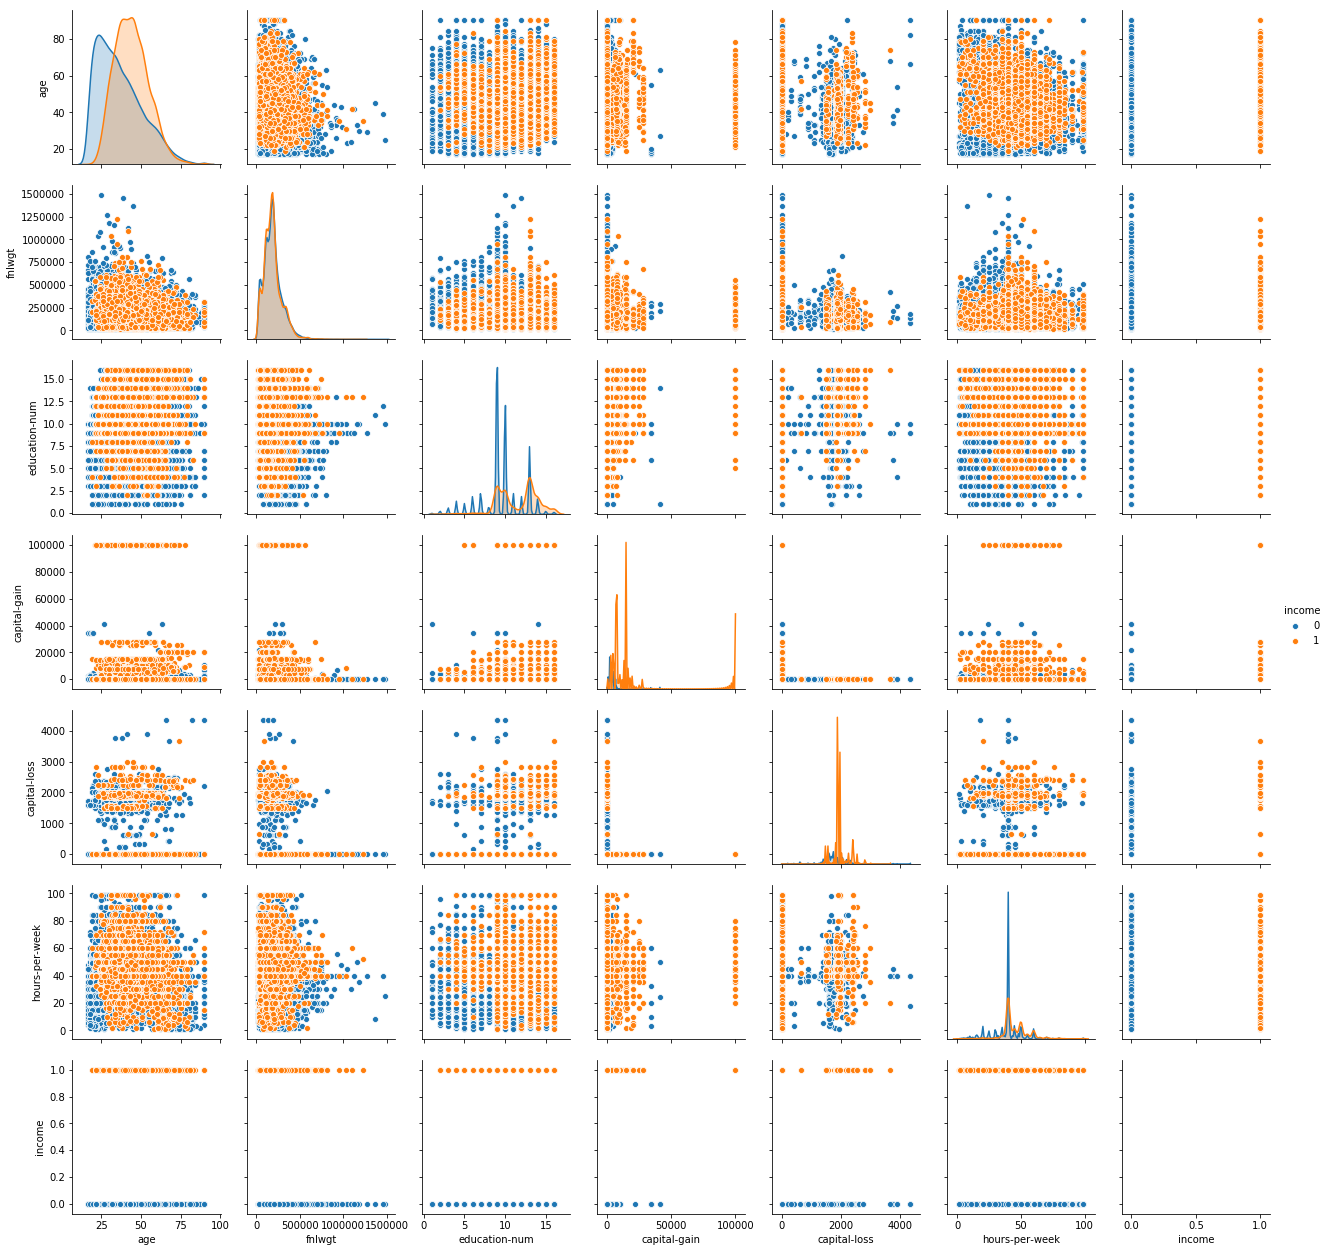

In [35]:
#pair Plot
sns.pairplot(adult, hue ='income')

* From pair plot it is evident that Logistic won't give good result for this dataset  as there is no clear demarkation of stright line
* Ensemble technicque(XG Boost) and KNN May work better than any other Algorithm for the dataset

#### Applying Logistic Regression

In [36]:
import time
from sklearn.linear_model import LogisticRegression
start = time.time()
LR_model = LogisticRegression()
score = cross_val_score(LR_model, X, y, cv=20)
end = time.time()
#evaluation(Accuracy)
print("Accuracy:",score.mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Accuracy: 0.7972977802370951


#### Apply Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
#making the instance
dt_model = DecisionTreeClassifier()
score_DT = cross_val_score(dt_model, X, y, cv=20)
#evaluation(Accuracy)
print("Accuracy:",score_DT.mean())

Accuracy: 0.8158786920760284


#### Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
model_rcf=RandomForestClassifier()
score_rcf = cross_val_score(model_rcf, X, y, cv=20)
#evaluation(Accuracy)
print("Accuracy:",score_rcf.mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

Accuracy: 0.8471132992158964


#### Apply KNN

##### Find n Value

In [39]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scaled=sc.fit_transform(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3)

error_rate=[]
for i in range(1,30):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Error Rate')

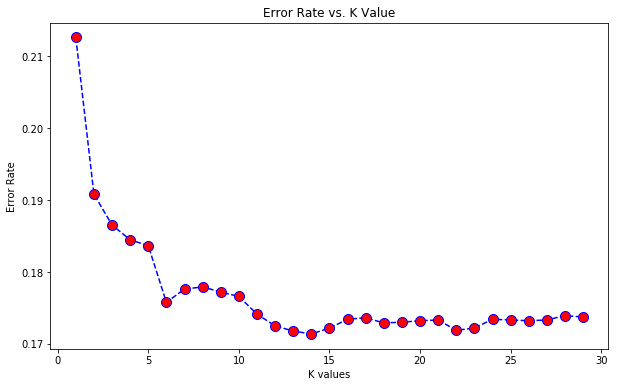

In [48]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='red',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K values')
plt.ylabel('Error Rate')

#### From above figure, we can conclude n value as 19 as the error rate is almost constatnt after that 

In [49]:
### Apply K Nearest Neighbor Algorithm

knn_model = KNeighborsClassifier(n_neighbors=19)
score_knn = cross_val_score(knn_model, X_scaled, y, cv=20)
#evaluation(Accuracy)
print("Accuracy:",score_knn.mean())

Accuracy: 0.8312350898479064


#### It is very evident from above alogorithms that accuracy of XG Boost is best among all the algorithm which is concluded from Pair plot while KNN too gives matching accuracy